In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import numpy as np
import seaborn as sns


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#lectura de datos
df = pd.read_csv('/content/drive/MyDrive/covid_muestra2.csv')
poblacion = pd.read_csv('/content/drive/MyDrive/covid.csv')

1. Realizar un histograma para el total de casos y el total de muertes. Responder:

    a) Si elijo una país al azar ¿En qué intervalo de valores es más probable encontrar el total de
    casos de este país?

    b) Estimar la probabilidad de que, al elegir un país al azar, este tenga un total de casos dentro
    del intervalo encontrado en el inciso anterior.

#Histogramas

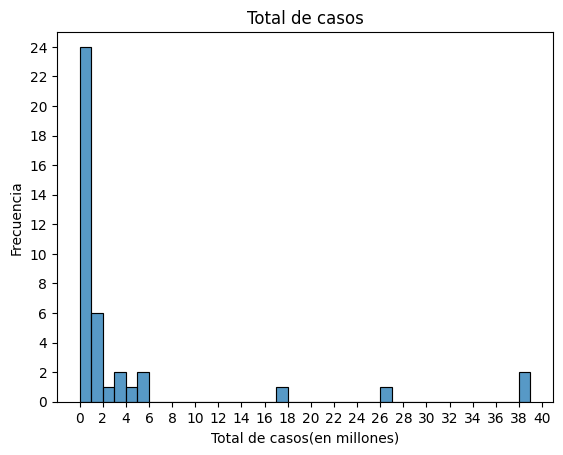

In [ ]:
sns.histplot(data = df['Total de casos']/1000000, bins=39);

# Set labels and limits
plt.title('Total de casos')
plt.xlabel('Total de casos(en millones)')
plt.ylabel('Frecuencia')
plt.yticks(range(0,30,2))
plt.xticks(range(0,42,2))
plt.ylim(0, 25);

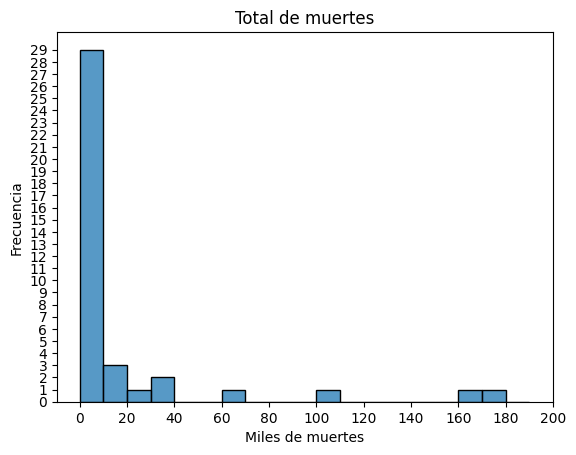

In [ ]:
sns.histplot(data = df['Total de muertes']/1000, bins = (range(0,200,10)));

# Set labels and limits
plt.title('Total de muertes')
plt.xlabel('Miles de muertes')
plt.ylabel('Frecuencia')
plt.yticks(range(0,30,1));
plt.xticks(range(0,220,20));
#plt.ylim(0, 27);

a) Al elegir un país al azar, el intervalo en el que es más probable que se encuentre el total de casos de ese país es el primero.
Ya que es el que tiene la mayor cantidad de países dentro de dicho intervalo. Que va desde 0 a 1000000.

b) La probabilidad de que si elijo un país al azar, este tenga un total de casos dentro del intervalo antes mencionado se calcula de la siguiente manera:

\begin{equation}
P(intervalo)=\frac{\text{Cantidad dentro de intervalo}}{\text{Tamaño de muestra}}
\end{equation}

\begin{equation}
P(intervalo)=\frac{24}{40}
\end{equation}

La probabilidad de que caiga en dicho intervalo un país elegido al azar es de:
\begin{equation}
\frac{24}{40}=0.60
\end{equation}


2. Realizar un gráfico de caja para el total de casos y el total de muertes.

    a) ¿En qué intervalo se concentra el 50 % de los valores centrales?

    b) ¿Se puede distinguir algún valor atípico a partir de estos diagramas? ¿Qué característica tiene
    que tener un valor para considerarse atípico?

    c) Quitar los valores atípicos y mostrar el diagrama de cajas sin ellos. Indicar donde se encuentra
    el primer, segundo y tercer cuartil.
    
    d) ¿Qué información se puede destacar fácilmente de un gráfico de cajas a diferencia de un
    histograma?


  # Gráficos de caja

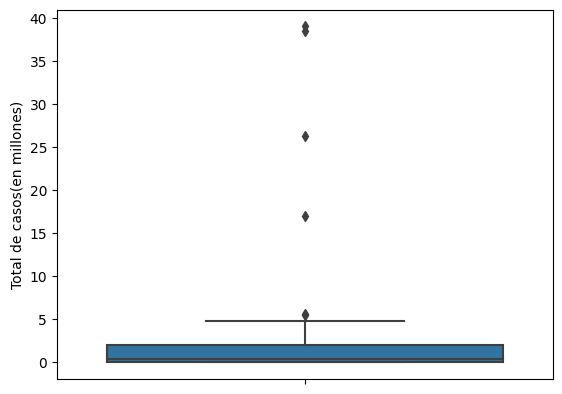

In [ ]:
sns.boxplot(y= df['Total de casos']/1000000)
plt.ylabel('Total de casos(en millones)')
plt.yticks(range(0,41,5));

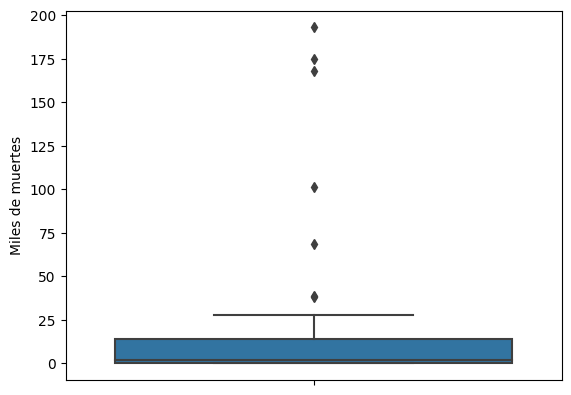

In [ ]:
sns.boxplot(y= df['Total de muertes']/1000)
plt.ylabel('Miles de muertes');

In [ ]:
#Obtengo cuartiles.
q1 = np.percentile(df['Total de casos'], 25)
mediana = np.percentile(df['Total de casos'], 50)
q3 = np.percentile(df['Total de casos'], 75)
print(q1,'   ',mediana, '   ',q3)

24767.25     374371.5     2068021.0


a) EL 50% de los valores centrales se concentra en el intervalo que va desde el primer cuartil hasta el tercer cuartil. Que en este caso particular para la variable 'Total de casos' es el [24767; 2068021]

b) A partir de este diagrama, resultan fácil de detectar los valores atípicos a simple vista ya que son aquellos que van mas allá de los 'bigotes' del gráfico.
Para considerarse valor atípico, debe estar alejado del primer o tercer cuartil en más de 1.5 Rango intercuartílico, el Rango intercuartílico se calula como:   
\begin{equation}
RIC=\text{Tercer cuartil} - \text{Primer cuartil}
\end{equation}

In [ ]:
# Buscar valores atipicos
ric = q3 - q1
lim_inferior = q1-1.5*ric
lim_superior = q3+1.5*ric

valores_atipicos = []
for x in df['Total de casos']:
    if ((x<lim_inferior) or (x>lim_superior)):
        valores_atipicos.append(x)
print('valores atipicos: ', valores_atipicos)


valores atipicos:  [5631629, 38997490, 26318717, 17004677, 5464525, 38437756]


c) Diagrama de cajas para la variable 'Total de casos' pero sin los valores atípicos.

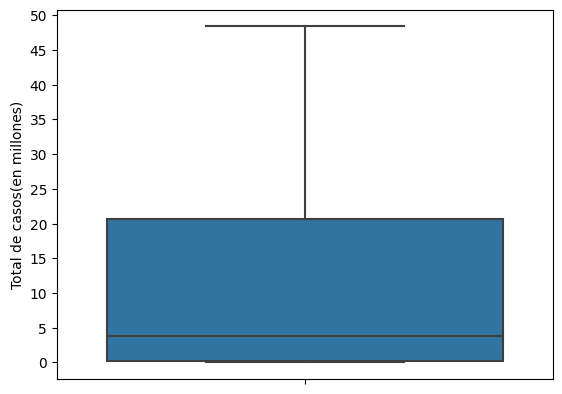

In [ ]:
sns.boxplot(y= df['Total de casos']/100000, showfliers = False)
plt.ylabel('Total de casos(en millones)')
plt.yticks(range(0,55,5));

C) El primer cuartil es el limite inferior de la caja, el tercer cuartil es el límite superior de la caja y la mediana es la línea horizontal que divide la caja. En este caso particular los valores son: Primer cuartil: 24767, Mediana: 374371, Tercer cuartil: 2068021.

D) A diferencia de un histograma, en el cual podemos ver la distribución de los datos. El gráfico de cajas nos permite visualizar el centro, la dispersión la simetría de los datos y la presencia de valores atípicos.

#Teorema central del límite

3)
  >a) A partir de una muestra aleatoria cualquiera M = {X1, X2, ..., X40} de 40 valores para una
  población con media μ y varianza σ2:

  >>i)¿Qué distribución sigue la media muestral o promedio? ¿Por qué? Hacer un gráfico esquemático indicando la media y el desvío estándar de esta variable.
        
  >>ii) ¿Cuál es la probabilidad de que la media muestral se aleje de la media de la población en más de un cuarto del desvío estándar de la población?

  >b) Encontrar un intervalo tal que haya un 95 % de probabilidad de que la media real de la población de la variable ”Total de casos” caiga dentro, a partir de la muestra tomada. ¿Qué podríamos hacer para achicar el largo del intervalo?

3. a)

  >i) Las medias de cada muestra tomada de la población, al ser suficientemente grandes (n>30) por el teorema central del límite, sin importar la distribución de la población, seguirá una distribución normal centrada en la media de la población.

In [ ]:
lista_mues = []
lista_prom = []
for i in range(1000):
  muestra = poblacion.sample(n=40)
  lista_mues.append(muestra)
  lista_prom.append(muestra['Total de casos'].mean())


A continuación se presenta gráfico de distribución de las medias muestrales de la variable total de casos. Tomando 1000 muestras con un tamaño de muestra n=40. Si bien la distribución de la población no es normal, por el **teorema central del límite** podemos observar como la distribución de las medias muestrales se va aproximando a una campana, es decir, a una *Distribución Normal*.

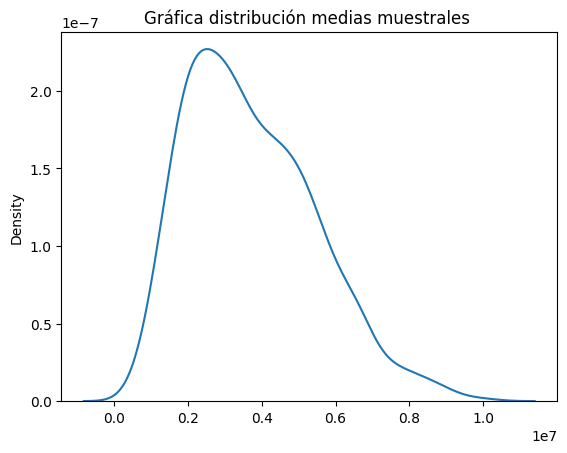

In [ ]:
sns.kdeplot(lista_prom)
plt.title('Gráfica distribución medias muestrales ');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Intervalo de confianza

* Cálculos necesarios para obtener intervalos.

In [ ]:
media_poblacion = poblacion['Total de casos'].mean(axis='index')
print('Media de la población:', media_poblacion)

Media de la población: 3735372.805825243


In [ ]:
desvio_poblacion = poblacion['Total de casos'].std(axis=0)
print('Desvío estándar de la población: ', desvio_poblacion)

Desvío estándar de la población:  12095970.416183455


3. b)

  *Intervalo de confianza* de 95% para la media de la población de la variable **'Total de casos'**.



*   Tomamos como estimador puntual a la media muestral:

 \begin{equation}
\overline{x}= \frac{1}{n}
\
\sum_{i=1}^{n}x_{i}
\
\end{equation}

*   A partir de la media muestral $ \overline{x}
$ obtenemos pivote:

\begin{equation}
Z= \frac{\overline{x}-\mu }{σ / \sqrt{n}}
\
\end{equation}


*   Conociendo la distribución de $ Z $  buscamos un intervalo tal que: \begin{equation}
P(-z < Z < z) = 0,95
\end{equation}
\begin{equation} 1-α = 0,05 → \frac{{α}}{2} = 0,025\end{equation}  
\begin{equation}
P(Z > z) = 0,025
\end{equation}

* Busco en la tabla de distribución normal y obtengo:
\begin{equation}
z_{0,025} = 1,96
\end{equation}

* Fórmula para obtener intervalo de confianza:
  $
  \left[\overline{x} - z_{\frac{α}{2}}{\frac{σ}{\sqrt{n}}};\overline{x} + z_{\frac{α}{2}}{\frac{σ}{\sqrt{n}}}\right]$

* Resolvemos:

  > $
  \left[228611 - 1,96{\frac{12095970}{\sqrt{40}}};228611 + 1,96{\frac{12095970}{\sqrt{40}}}\right]$

* Obtenemos el resultado del intervalo:

   >$
  \left[1032230;6888791\right]$

  *Para obtener un intervalo mas chico deberíamos tomar muestras mas grandes y así obtendríamos una mayor precisión.*





4. Realizar un gráfico de total de casos en función de la población. ¿Nota alguna relación entre estas
variables?. Estimar el coeficiente de correlación lineal entre ambas. ¿Qué significa su valor?

In [8]:
y = df['Total de casos']/1000000
x = df['Poblacion']/1000000

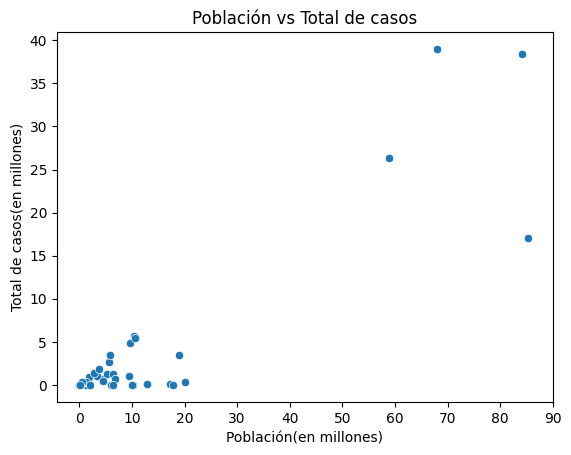

In [9]:
sns.scatterplot(data=df, x=x, y=y)
plt.xlabel('Población(en millones)')
plt.ylabel('Total de casos(en millones)')
plt.title('Población vs Total de casos')
plt.xticks(range(0,100,10));

Se puede ver a simple vista como al aumentar el tamaño de la población también aumenta el número total de casos

A partir de la estimación del coeficiente de correlación lineal podemos ver que tan lineal es la relación entre ambas variables.
Este se calcula de la siguiente manera:

\begin{equation}
\rho_xy=\frac{\text{cov(x,y)}}{\sigma_x.\sigma_y}
\end{equation}

En este caso lo calculamos con python.

In [11]:
#Coeficiente de correlacion lineal
x = df['Poblacion']
y = df['Total de casos']
coef_lineal = x.corr(y)
print('Coeficiente de correlación lineal = ', coef_lineal)

Coeficiente de correlación lineal =  0.8979496110393863


El coeficiente de correlación lineal puede tomar valores desde -1 a 1, siendo 1 una relación perfectamente lineal y -1 una relación perfectamente lineal inversa. En este caso, con los datos que tenemos nos arrojó un resultado de 0.8979.

5) Encontrar los coeficientes β0 y β1 por mínimos cuadrados de la recta que mejor ajusta a estas
variables.
  >a) Agregar una recta al gráfico hecho en el inciso anterior.

  >b) Estimar el total de casos de COVID para una población de 400 millones de personas. ¿Qué
  tanta confianza tengo en esta estimación?

  >c) Calcular el coeficiente de determinación. ¿Qué significa su valor?

  >d) Comparar este coeficiente con la regresión para el total de casos en función del total de vacunados.
  ¿A qué se debe esta diferencia?

#Modelo de regresión Lineal

In [6]:
import statsmodels.api as sm

In [14]:
#Coeficientes por mínimos cuadrados.
x = sm.add_constant(x)
modelo = sm.OLS(y, x)
resultados = modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total de casos   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     158.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.06e-15
Time:                        15:14:04   Log-Likelihood:                -665.88
No. Observations:                  40   AIC:                             1336.
Df Residuals:                      38   BIC:                             1339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.059e+06   7.77e+05     -1.364      0.180   -2.63e+06    5.13e+05
Poblacion      0.3913      0.031     12.577      0.000       0.328       0.454
==============================================================================
Omnibus:                       15.238   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.640
Skew:                          -0.542   Prob(JB):                     1.66e-11
Kurtosis:                       8.349   Cond. No.                     2.91e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##*Mediante la función anterior obtuvimos los parámetros β0 y β1.*

β0 = -1059000

β1 = 0.3913

In [18]:
#obtengo rango de variable explicativa
minimo = df['Poblacion'].min()
maximo = df['Poblacion'].max()
rango = [minimo, maximo]
print('Rango de variable Población:', rango)

Rango de variable Población: [12668, 85341241]


b) Debido a que el rango de nuestra variable explicativa va desde 12668 a 85341241, no podemos estimar la cantidad de casos para una población de 400000000, ya que no sabemos como se comporta la relación entre las dos variables fuera de nuestro rango.

In [15]:
#Calculo coeficiente de determinación.
print('Valor coeficiente de determinación = ', resultados.rsquared)

Valor coeficiente de determinación =  0.8063135039657855


c) El coeficiente de determinación nos permite saber que proporción del comportamiento de la variable dependiente puede ser explicado
por el modelo de regresión lineal.

\begin{equation}
r^2=1-\frac{\text{SCE}}{\text{STC}}
\end{equation}

Para nuestro caso particular, el valor del coeficiente de determinación es de 0.80, por lo que en proporción el 80% de los cambios de "y"
pueden ser explicados por el modelo de regresión lineal.

In [12]:
#Calculo de coeficiente de determinación con variable 'total de vacunados'
x1 = df['Total de vacunados']
x1 = sm.add_constant(x1)
modelo = sm.OLS(y, x1)
resultados = modelo.fit()
print('Valor Coeficiente de determinacion = ', resultados.rsquared)

Valor Coeficiente de determinacion =  0.9333557246151644


d) El coeficiente de determinacion para el total de casos en función del total de vacunados es de 0.93, por lo que los cambios en la  variable dependiente 'total de casos' se puede explicar en un 93% mediante el modelo de regresión lineal.

## Recta de regresión lineal

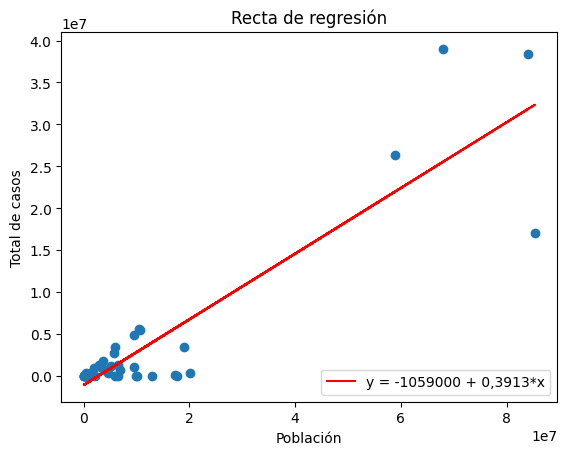

In [ ]:
plt.scatter(df['Poblacion'], df['Total de casos'])
plt.plot(df['Poblacion'], b0+b1*df['Poblacion'], color = 'r', label = 'y = -1059000 + 0,3913*x')
plt.title('Recta de regresión')
plt.xlabel('Población')
plt.ylabel('Total de casos')
plt.legend(loc= 'lower right');